# Labjournaal BM
## General
Template for labjournaal. See https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html for options to use markdown.

**Name:**  Meine de Boer 

**Title of the experiment:**  
**Starting date:**  
**Expected enddate:**  
**Partner:**  Ebe

**Goal of the experiment:**  
**Research question:**  
**Expectations or Hypothesis:**  
**Desired accuracy:**  




In [13]:
#import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit 
import pandas as pd


# Preparation
 


**Assignments:**  

**Method:**  
**Theory:**  
**Independent variable:**  
**Dependent variable:**  
**Controlled variablen:**  
**Measurement instruments \& Settings:**  
**Procedure:**  
**Setup(drawing or picture):**  
**Notes:**  
**About accuracy:**  


# Execution

In [14]:
# Measurements: Explain the names of variables provide only raw data in np.arrays!

weerstanden = np.array([10, 100, 330, 330, 470, 1000, 4700, 10000, 10000, 33000])
drie= np.array([10.5, 101.1, 330, 323.5, 470, 1000, 4700, 10020, 10040, 33140])
vijf = np.array([10.087, 100.427, 329.48, 323.06, 468.37, 996.67, 4702.3, 10021.8, 10039.3, 33127])


tabel = pd.DataFrame({
    "Weerstandsnummer": range(1, len(weerstanden)+1),
    "Theoretisch Weerstand (Ω)": weerstanden,
    "3 1/2 DMM (Ω)": drie,
    "5 1/2 DMM (Ω)": vijf,
})

print(tabel.to_string(index=False))


 Weerstandsnummer  Theoretisch Weerstand (Ω)  3 1/2 DMM (Ω)  5 1/2 DMM (Ω)
                1                         10           10.5         10.087
                2                        100          101.1        100.427
                3                        330          330.0        329.480
                4                        330          323.5        323.060
                5                        470          470.0        468.370
                6                       1000         1000.0        996.670
                7                       4700         4700.0       4702.300
                8                      10000        10020.0      10021.800
                9                      10000        10040.0      10039.300
               10                      33000        33140.0      33127.000


**Observations:**  
**Notes:**  

# Processing
**Description of processing of raw data into scientific evidence:**


In [15]:
#Data processing and analysis:
q = 1.602e-19
T=293.15 #K
U_T= 3
n=2.0
Un_n=0.1
log10e=np.log10(np.e)


R_1 = 4702.300 #Ohm
Un_R_1 = 0.0002*R_1 + 0.00003 * 20000

R_2 = 996.6700
Un_R_2 = 0.0002*R_2 + 0.00003 * 2000

R_3 = 329.480
Un_R_3 = 0.0002*R_3 + 0.00003 * 2000

V_in = np.array([6.00, 5.75, 5.5, 5.25, 5.00, 4.75, 4.5, 4.25, 4.00, 3.75, 3.5, 3.25, 3.00, 2.75, 2.5, 2.25, 2.00, 1.75, 1.5, 1.25, 1.00, 0.75, 0.5])
V_R1 = np.array([0.9059, 0.8495, 0.7933, 0.7378, 0.6821, 0.6268, 0.5718, 0.5170, 0.4630, 0.4094, 0.3565, 0.3045, 0.2536, 0.2044, 0.1573, 0.1131, 0.0736, 0.0412, 0.0188, 0.0069, 0.0021, 0.0006, 0.0001])
V_R3 = V_in*(R_3/(R_2+R_3))
V_D = V_R3-V_R1

Un_Vin = 0.007*V_in + 0.01
Un_VR1 = 0.00015*V_R1 + 0.00004
Un_VR3 = np.sqrt(((((V_in+Un_Vin)*(R_3/(R_2+R_3)))-((V_in-Un_Vin)*(R_3/(R_2+R_3))))/2)**2 + (((V_in*((Un_R_3 + R_3)/(R_2+(Un_R_3+R_3)))-V_in*((R_3-Un_R_3)/(R_2+(R_3-Un_R_3))))/2)**2 + ((V_in*(R_3/((R_2+Un_R_2)+R_3))-V_in*(R_3/((R_2-Un_R_2)+R_3)))/2)**2))
Un_VD = np.sqrt(Un_VR3**2 + Un_VR1**2)

I_D= V_R1/R_1
log_I_D = np.log10(I_D)

Un_I_D = np.sqrt(((((Un_VR1+V_R1)/R_1)-(V_R1-Un_VR1)/R_1)/2)**2 + ((((V_R1/(R_1+Un_R_1))-(V_R1/(R_1-Un_R_1)))/2)**2))
Un_log_ID = np.sqrt(((np.log10(I_D+Un_I_D)-np.log10(I_D-Un_I_D))/2)**2)

print("V_D:", V_D)

print(Un_R_1,Un_R_2, Un_R_3)
R_D = V_D*I_D
print(R_D)


V_D: [0.5847911  0.57907897 0.57316684 0.56655471 0.56014258 0.55333045
 0.54621832 0.53890619 0.53079407 0.52228194 0.51306981 0.50295768
 0.49174555 0.47883342 0.46382129 0.44590916 0.42329703 0.3935849
 0.35387277 0.30366065 0.24634852 0.18573639 0.12412426]
1.54046 0.259334 0.125896
[1.12660242e-04 1.04614249e-04 9.66959263e-05 8.88935342e-05
 8.12524201e-05 7.37569972e-05 6.64201853e-05 5.92506864e-05
 5.22632865e-05 4.54718382e-05 3.88978556e-05 3.25692986e-05
 2.65203563e-05 2.08139742e-05 1.55156177e-05 1.07250338e-05
 6.62540919e-06 3.44846097e-06 1.41479875e-06 4.45581620e-07
 1.10016776e-07 2.36994306e-08 2.63964992e-09]


Fitted parameters: [ 8.59626516 -8.44223118]
log(I0)= -8.442231182005736
a= 8.596265164026844


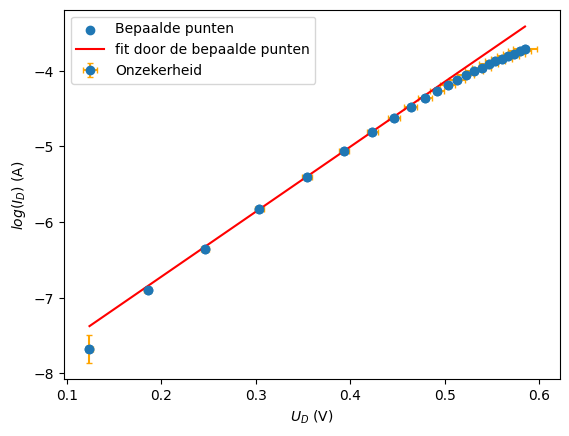

De berekende Boltzmann constante met onzekerheid is 1.3804e-23 +/- 1.4128e-25 J/K


In [16]:
#Data processing and analysis:
plt.figure()
plt.scatter(V_D, log_I_D, label= "Bepaalde punten")
plt.errorbar(V_D, log_I_D, xerr=Un_VD, yerr=Un_log_ID, fmt='o', ecolor='orange', capsize=2, label= 'Onzekerheid')

#De punten in de grafiek die het meest op een lijn lijken te liggen worden meegenomen in de berekening, dit zijn punten 16 t/m 20 in de array

V_Dfit = V_D[16:20]
log_I_Dfit = log_I_D[16:20]
def func(V,a,b):
    return a*V+b
    
popt, pcov= curve_fit(func, V_Dfit,log_I_Dfit)
plt.plot(V_D, func(V_D, *popt), 'r-', label='fit door de bepaalde punten')
print("Fitted parameters:", popt)
k_B = log10e*q/(n*T*popt[0])
#print("De berekende waarde van de Boltzmann constante is", k_B, "J/K")

Un_Vdfit = Un_VD[16:20]
Un_log_Idfit = Un_log_ID[16:20]


print("log(I0)=", popt[1])
print("a=", popt[0])
afit = popt[0]
bfit = popt[1]

plt.xlabel("$U_D$ (V)"); plt.ylabel('$log (I_D)$ (A)')
plt.legend()
plt.savefig("boltzmanngrafiekfinalfinalfinal.png")
plt.show()

def funcunc(n_unc,T_unc):
    return (log10e*q/(n_unc*T_unc*afit))

uncKB=np.sqrt((((funcunc(n+Un_n,T)-funcunc(n-Un_n,T)/2)**2+(funcunc(n,T+U_T)-funcunc(n,T-U_T))/2)**2))



print(f"De berekende Boltzmann constante met onzekerheid is {k_B:.4e} +/- {uncKB:.4e} J/K")



In [17]:
#Data processing and analysis:


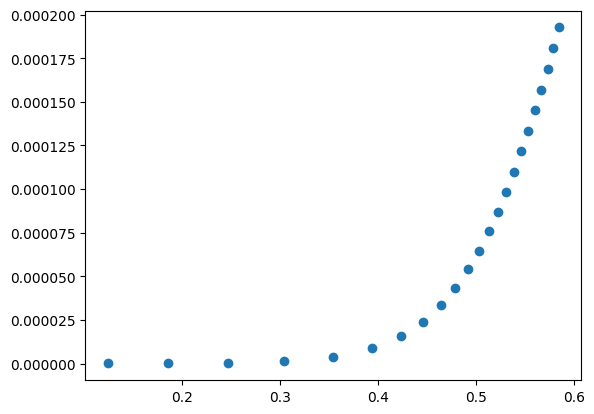

In [18]:
plt.scatter(V_D, I_D)

**Describing the pattern in the processed data:**  


In [19]:
#Calculations of e.a. measurement uncertainties, and providing final answers.


**Notes:**  

# Discussion



# Conclusion

# Additional notes, remarks, explanations, thoughts etc